In [16]:
words = open('names.txt' , 'r').read().splitlines()

In [17]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [18]:
len(words)

32033

In [19]:
min(len(w) for w in words)

2

In [20]:
max(len(w) for w in words)

15

In [21]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs , chs[1:]):
        bigram = (ch1 , ch2)
        b[bigram] = b.get(bigram , 0) + 1

In [22]:
sorted(b.items() , key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [23]:
import torch
max(b)

('z', 'z')

In [24]:
N = torch.zeros((27,27) , dtype=torch.int32)

In [25]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']  = 0
itos = {i:s for s,i in stoi.items()}

In [26]:
for w in words:
    chs = ['.'] + list(w ) + ['.']
    for ch1,ch2 in zip(chs , chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1 , ix2] += 1

In [27]:
print(N)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

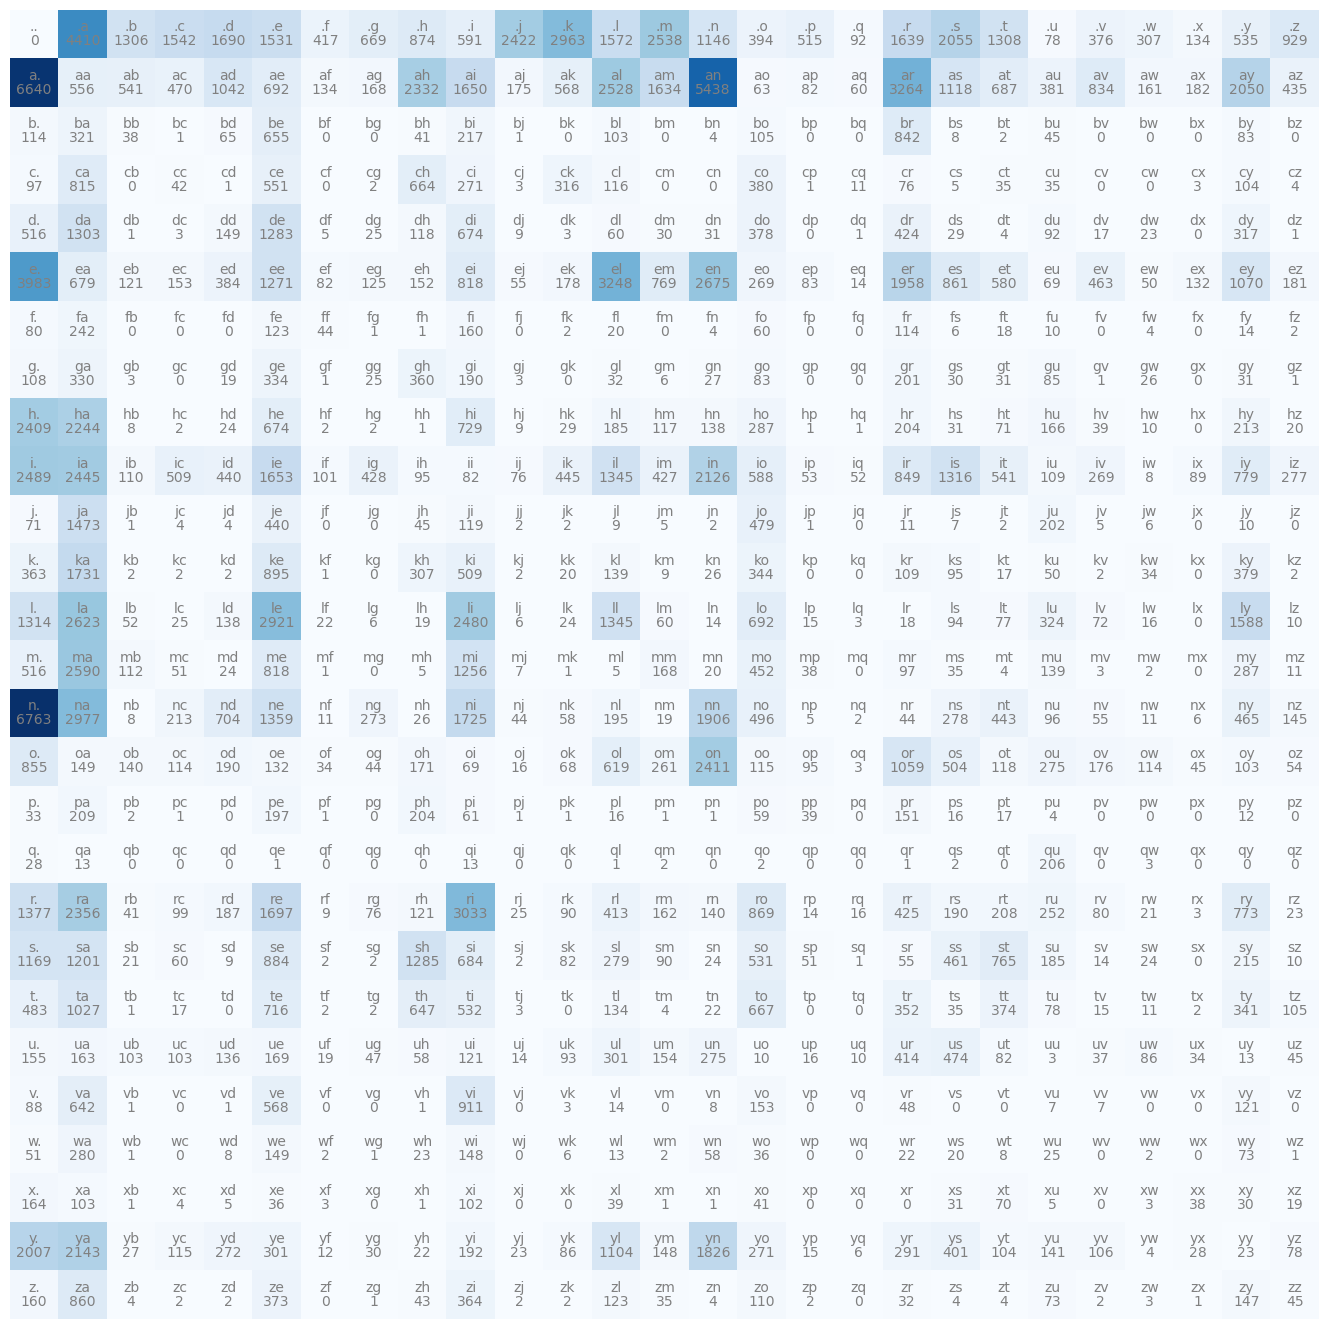

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(17, 17))
plt.imshow(N, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
        
plt.axis('off')
plt.show()

In [29]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [30]:
p = N[0].float()
p = p / p.sum()
p.to(device = 'mps')

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290],
       device='mps:0')

In [31]:
p = p.to('mps')  # Move tensor to MPS device
g = torch.Generator(device='mps').manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'd'

In [32]:
p.sum()

tensor(1., device='mps:0')

In [33]:
g = torch.Generator(device='mps').manual_seed(2147483647)
p = torch.rand(3 , generator=g , device='mps')
p = p / p.sum()
p

tensor([0.3999, 0.3954, 0.2047], device='mps:0')

In [34]:
torch.multinomial(p , num_samples = 20 , replacement=True , generator=g)

tensor([1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0],
       device='mps:0')

In [35]:
P = (N+1).float()
P /= P.sum(1 , keepdim=True)

In [36]:
P[0].sum()

tensor(1.)

In [37]:
g = torch.Generator(device='mps').manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix].to('mps')
        ix = torch.multinomial(p , num_samples = 1 , replacement=True , generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
        
    print(''.join(out))
    
    

daima.
sason.
odorsy.
jarascevonn.
ehirulystz.


In [38]:
log_likelihood = 0.0
n = 0 
for w in ['piyush']:
    chs = ['.'] + list(w ) + ['.']
    for ch1,ch2 in zip(chs , chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1 ,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2} : {prob:.4f} {logprob:.4f}')
        
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'Average Log Likelihood : {nll/n}')

.p : 0.0161 -4.1293
pi : 0.0589 -2.8323
iy : 0.0440 -3.1236
yu : 0.0145 -4.2346
us : 0.1502 -1.8956
sh : 0.1581 -1.8444
h. : 0.3153 -1.1542
log_likelihood = tensor(-19.2139)
nll = tensor(19.2139)
Average Log Likelihood : 2.744849681854248


In [39]:
# Create the training set of all the bigrams (x,y)

xs , ys = [],[]
for w in words[:1]:
    chs = ['.'] + list(w ) + ['.']
    for ch1,ch2 in zip(chs , chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [40]:
# xs

In [41]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27 , 27) ,generator=g, requires_grad=True) * 0.1

In [42]:
import torch.nn.functional as F 
xenc = F.one_hot(xs , num_classes= 27).float()
logits = (xenc @ W) #log-counts
counts = logits.exp() # Equivalent of N matrix that gave us counts for adjacent characters
probs = counts / counts.sum(1 , keepdim=True)
loss= - probs[torch.arange(5) , ys].log().mean()

In [43]:
print(loss.item())

3.3019447326660156


In [44]:
# Backward Pass
W.grad = None # sets gradient to zero
loss.backward()

In [68]:
# Create the training set of all the bigrams (x,y)

xs , ys = [],[]
for w in words:
    chs = ['.'] + list(w ) + ['.']
    for ch1,ch2 in zip(chs , chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples : ', num)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27 , 27) , generator=g , requires_grad=True)

. e
e m
m m
m a
a .
. o
o l
l i
i v
v i
i a
a .
. a
a v
v a
a .
. i
i s
s a
a b
b e
e l
l l
l a
a .
. s
s o
o p
p h
h i
i a
a .
. c
c h
h a
a r
r l
l o
o t
t t
t e
e .
. m
m i
i a
a .
. a
a m
m e
e l
l i
i a
a .
. h
h a
a r
r p
p e
e r
r .
. e
e v
v e
e l
l y
y n
n .
. a
a b
b i
i g
g a
a i
i l
l .
. e
e m
m i
i l
l y
y .
. e
e l
l i
i z
z a
a b
b e
e t
t h
h .
. m
m i
i l
l a
a .
. e
e l
l l
l a
a .
. a
a v
v e
e r
r y
y .
. s
s o
o f
f i
i a
a .
. c
c a
a m
m i
i l
l a
a .
. a
a r
r i
i a
a .
. s
s c
c a
a r
r l
l e
e t
t t
t .
. v
v i
i c
c t
t o
o r
r i
i a
a .
. m
m a
a d
d i
i s
s o
o n
n .
. l
l u
u n
n a
a .
. g
g r
r a
a c
c e
e .
. c
c h
h l
l o
o e
e .
. p
p e
e n
n e
e l
l o
o p
p e
e .
. l
l a
a y
y l
l a
a .
. r
r i
i l
l e
e y
y .
. z
z o
o e
e y
y .
. n
n o
o r
r a
a .
. l
l i
i l
l y
y .
. e
e l
l e
e a
a n
n o
o r
r .
. h
h a
a n
n n
n a
a h
h .
. l
l i
i l
l l
l i
i a
a n
n .
. a
a d
d d
d i
i s
s o
o n
n .
. a
a u
u b
b r
r e
e y
y .
. e
e l
l l
l i
i e
e .
. s
s t


In [69]:
import torch.nn.functional as F 
for k in range (1000):
    xenc = F.one_hot(xs , num_classes= 27).float()
    logits = (xenc @ W) #log-counts
    counts = logits.exp() # Equivalent of N matrix that gave us counts for adjacent characters
    probs = counts / counts.sum(1 , keepdim=True)
    loss= - probs[torch.arange(num) , ys].log().mean()

    print( k,loss.item())

    # Backward Pass
    W.grad = None # sets gradient to zero
    loss.backward()
    
    W.data += -50 * W.grad
    

0 3.758953332901001
1 3.371100664138794
2 3.154043197631836
3 3.020373582839966
4 2.927711248397827
5 2.8604023456573486
6 2.8097290992736816
7 2.7701025009155273
8 2.7380731105804443
9 2.711496353149414
10 2.6890029907226562
11 2.6696884632110596
12 2.6529300212860107
13 2.638277292251587
14 2.6253881454467773
15 2.613990545272827
16 2.60386323928833
17 2.5948216915130615
18 2.5867116451263428
19 2.579403877258301
20 2.572789192199707
21 2.5667762756347656
22 2.5612881183624268
23 2.5562589168548584
24 2.551633596420288
25 2.547366142272949
26 2.543415069580078
27 2.5397486686706543
28 2.5363364219665527
29 2.5331544876098633
30 2.5301806926727295
31 2.5273969173431396
32 2.5247862339019775
33 2.522334575653076
34 2.520028829574585
35 2.517857789993286
36 2.515810489654541
37 2.513878345489502
38 2.512052059173584
39 2.510324001312256
40 2.5086867809295654
41 2.5071346759796143
42 2.5056614875793457
43 2.5042612552642822
44 2.502929210662842
45 2.5016613006591797
46 2.5004520416259766

In [76]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims = True) #probabilities for the next character
    # ----------
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
